# Vaccine RCT Examples

Victor Chernozhukov. This notebook contains some RCT examples that I will be using for teaching.

  
# Polio RCT

One of the earliest randomized experiments were the Polio vaccination trias conducted by the Public Health Service in 1954.  The question was whether Salk vaccine prevented polio.  Children in the study were randomly assigned either a treatment (polio vaccine shot) or a placebo (saline solution shot), without knowing which one they received. The doctors in the study, making the diagnosis, did not know whether a child received a vaccine or not. In other words, the trial was a double-blind, randomized control trial.  The trial had to be large, because the rate at which Polio occured in the population was 50 per 100,000.  The treatment group saw 33 polio cases per 200,745; the control group saw 115 cases per 201,229. The estimated avearage treatment effect is about
$$
-40
$$
with the 95% confidence band (based on approximate normality of the two sample means and their differences):
$$[-52, -28].$$
As this is an RCT, the confidence band suggests that the Polio vaccine **caused** the reduction in the risk of polio.

The interesting thing here is that we don't need the underlying individual data to evaluate the effectivess of the vaccine. This is because the outcomes are Bernoulli random variables, and we have enough information to compute the estimate of ATE as well as the confidence intervals from the group case counts.

We also compute the Vaccine Efficacy metric, which refers to the following measure according to the [CDC](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section6.html):
$$
VE = \frac{\text{Risk for Unvaccinated - Risk for Vaccinated}}{\text{Risk for Unvaccinated}}.
$$
It describes the relative reduction in risk caused by vaccination.


It is staighforward to get the VE estimate by just plugging-in the numbers, but how do we get the approximate variance estimate? I am too lazy to do calculations for the delta method, so I will just use a simulation (a form of approximate bootstrap) to obtain the confidence intervals.



Incidence per 100000 among treated:16.438765598146905
Incidence per 100000 among controlled:57.14882049803955
Estimate TE of occurances per 100,000 -40.71005489989265
Standard deviation for ATE6.047412320702958
95 % confidence interval is [-52.56298304847044,-28.85712675131485]
Overall VE is 0.7123516206478694
95 % confidence interval is [0.5850765554161478 , 0.8177282081822294 ]


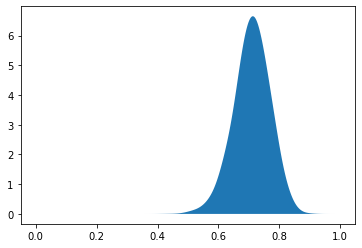

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


NT = 200745 #number of treated

NC = 201229 #number of controlled

YT = 33/NT  #average outcome for treated

YC =115/NC  #average outcome for controlled

#incidence per 100000 

print("Incidence per 100000 among treated:" + str(YT*100000))

print( "Incidence per 100000 among controlled:"+ str(YC*100000))


# treatment effect estimate reduction in incidence  per 100000 people

delta_hat = 100000*(YT-YC)

print("Estimate TE of occurances per 100,000 " + str(100000*(YT-YC)))

Var_delta_hat =  (100000**2)*(YT*(1-YT)/NT +  YC*(1-YC)/NC)

# standard deviation

print("Standard deviation for ATE"+ str(Var_delta_hat**.5))

# here we are using the fact that outcomes are Bernoulli 

CI_delta = [delta_hat -1.96*Var_delta_hat**.5, delta_hat +1.96*Var_delta_hat**.5]

print("95 % confidence interval is [" + str(CI_delta[0]) + ","+ 
            str(CI_delta[1]) + "]"   )
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it

NV =  200745;
NU =  201229;
RV = 33/NV;
RU = 115/NU;
VE = (RU - RV)/RU;
print("Overall VE is "+ str(VE) )

# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU



# set-up MC draws:

B = 10000
RVs = RV  + np.random.normal(0, 1, B)*(Var_RV)**.5
RUs = RU  + np.random.normal(0, 1, B)*(Var_RU)**.5
VEs= (RUs - RVs)/RUs


CI_VE_L = np.quantile(VEs, .025)
CI_VE_U = np.quantile(VEs, .975)

print("95 % confidence interval is [" + str(CI_VE_L), ",", 
            str(CI_VE_U), "]"   )


from sklearn.neighbors import KernelDensity
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version


# instantiate and fit the KDE model
X= VEs[:, np.newaxis]
X_plot = np.linspace(0, 1, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill_between(X_plot[:, 0], np.exp(log_dens))



# Pfizer/BNTX Covid-19 RCT

Here is a link to the FDA [briefing](https://www.fda.gov/media/144245/download) and an interesting [discussion](
https://garycornell.com/2020/12/09/statistics-in-the-pfizer-data-how-good-is-the-vaccine/?fbclid=IwAR282lS0Vl3tWmicQDDhIJAQCMO8NIsCXyWbUWwTtPuKcnuJ2v0VWXRDQac), as well as data.

Pfizer/BNTX was the first vaccine approved for emergency use to reduce the risk of Covid-19 decease. In studies to assess vaccine efficacy, volunteers were randomly assigned to receive either a treatment (2-dose vaccination) or a placebo, without knowing which they recieved. The doctors making the diagnoses did not know now whether a given volunteer received a vaccination or not. The results of the study are given in the following table ![](https://lh6.googleusercontent.com/oiO6gYom1UZyrOhgpFx2iq8ike979u3805JHiVygP-Efh1Yaz2ttyPcgWKlT1AqHDM4v46th3EPIkOvRLyXA0fNUloPL-mL9eOFmSAzfbNOHyCZSQ0DyzMhcFUtQuZ520R5Qd2lj):

Here we see both the overall effects and the effects by age group. The confidence intervals for the averal ATE are tight and suggest high effectiveness of the vaccine. The confidence intervals for the age group 65-75 are much wider.  We could group 65-75 and >75 groups to evaluate the effectiveness of the vaccine and also narrow down the width of the confidence band. 

In this case, the reported results are for vaccine effectiveness. We use the same approach as above.



In the code cell below  we calculate the overall effectiveness of the vaccie and construct confidence intervals for it.

Overall VE is 0.9461934124362605
95 % confidence interval is [0.9087739385135555 , 0.9807040772512654 ]


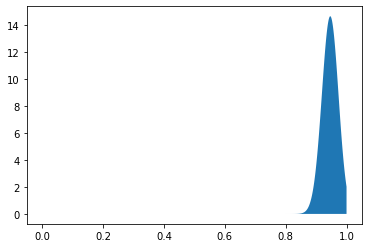

In [2]:

NV =  19965;
NU =  20172;
RV = 9/NV;
RU = 169/NU;
VE = (RU - RV)/RU;

print("Overall VE is "+ str(VE))

# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:


Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

# set-up MC draws:

B = 10000
RVs = RV  + np.random.normal(0, 1, B)*(Var_RV)**.5
RUs = RU  + np.random.normal(0, 1, B)*(Var_RU)**.5
VEs= (RUs - RVs)/RUs


CI_VE_L = np.quantile(VEs, .025)
CI_VE_U = np.quantile(VEs, .975)

print("95 % confidence interval is [" + str(CI_VE_L), ",", 
            str(CI_VE_U), "]"   )


from sklearn.neighbors import KernelDensity
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version


# instantiate and fit the KDE model
X= VEs[:, np.newaxis]
X_plot = np.linspace(0, 1, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill_between(X_plot[:, 0], np.exp(log_dens))




In the code cell below  we calculate the effectiveness of the vaccine for the two groups that are 65 or older

Overall VE is 0.9470690822010516
95 % confidence interval is [0.8120720187420987 , 1.054220060680372 ]
95 % confidence interval is [0.8423190516504862 , 1 ]


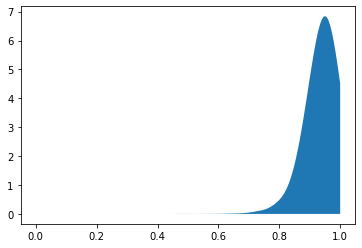

In [3]:
# Here we calculate the overall effectiveness of the vaccine for the two groups that are 65 or older

NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

print("Overall VE is "+ str(VE))

# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:


Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

# set-up MC draws:

B = 10000
RVs = RV  + np.random.normal(0, 1, B)*(Var_RV)**.5
RUs = RU  + np.random.normal(0, 1, B)*(Var_RU)**.5
VEs= (RUs - RVs)/RUs


CI_VE_L = np.quantile(VEs, .025)
CI_VE_U = np.quantile(VEs, .975)

print("95 % confidence interval is [" + str(CI_VE_L), ",", 
            str(CI_VE_U), "]"   )


CI_VE_L = np.quantile(VEs, .05)


print("95 % confidence interval is [" + str(CI_VE_L), ",", 
            str(1), "]"   )


from sklearn.neighbors import KernelDensity
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version


# instantiate and fit the KDE model
X= VEs[:, np.newaxis]
X_plot = np.linspace(0, 1, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill_between(X_plot[:, 0], np.exp(log_dens))




Overall VE is 0.9470690822010516
95 % confidence interval is [0.8 , 1.0 ]
95 % confidence interval is [0.8333333333333334 , 1 ]


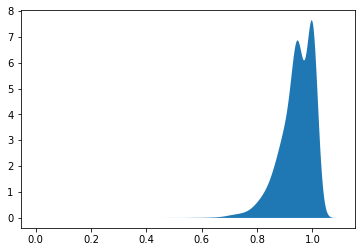

In [4]:

NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

print("Overall VE is "+ str(VE))

B = 10000 #number of simulation draw

#numpy.random.binomial(n, p, size=None)

RVs = np.random.binomial(NV, RV, B) 
RUs = np.random.binomial(NU, RU, B)  
VEs= (RUs - RVs)/RUs


CI_VE_L = np.quantile(VEs, .025)
CI_VE_U = np.quantile(VEs, .975)

print("95 % confidence interval is [" + str(CI_VE_L), ",", 
            str(CI_VE_U), "]"   )


CI_VE_L = np.quantile(VEs, .05)


print("95 % confidence interval is [" + str(CI_VE_L), ",", 
            str(1), "]"   )


from sklearn.neighbors import KernelDensity
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version


# instantiate and fit the KDE model
X= VEs[:, np.newaxis]
X_plot = np.linspace(0, 1.1, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill_between(X_plot[:, 0], np.exp(log_dens)) 

# Exact Binomial Test Inversion

It is possible to use exact inference by inverting tests based on the exact binomial nature of the outcome variable. Here, we perform the Cornfield Procedure to find the exact confidence interval on the estimate of vaccine efficacy. 

In [5]:
def CI_journal(NV, RV_infected, NU, RU_infected):
    # from https://www.medrxiv.org/content/10.1101/2020.12.16.20248359v1.full.pdf
    RV = RV_infected/NV;
    RU = RU_infected/NU;
    RR = RV/RU;
    print("Overall Risk Ratio is "+ str(RR))

    # this recovers the number in the table.

    # we set up a simulation example.

    # calulate variance of risk estimates:
    stat = 1.96*(1/RV_infected + 1/RU_infected)**.5
    print("95 % confidence interval is [" + str(1-RR*np.exp(stat)), ",", 
                str(1-RR*np.exp(-stat)), "]"   )

# Exact CI exploiting Bernoulli outcome using the Cornfield Procedure

NV =  19965
NU =  20172
RV = 9/NV
RU = 169/NU
VE = (RU - RV)/RU
print(f"""
Overall VE is {VE}
""")



Overall VE is 0.9461934124362605



Note that this exactly recovers the result in the FDA table (first row).

Next we repeat the cornfield procedure to find the exact confidence interval on vaccine effectiveness for the two groups that are 65 or older. Here we see a big discrepancy between various asymptotic approaches and the exact finite-sample inference. This occurs because the binomial counts are too low for central limit theorems to work successfully.

In [6]:
# Exact CI exploiting Bernoulli outcome for the two groups that are 65 or older
NV =  3239+805
NU =  3255+812
RV = 1/NV
RU = (14+5)/NU
VE = (RU - RV)/RU

print(f"""
Overall VE is {VE}
""")



Overall VE is 0.9470690822010516

